## Data Cleaning


In [1]:
import numpy as np
import pandas as pd

In [9]:
rish = pd.read_csv("Train_BigMart.csv")

In [10]:
rish

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
rish.shape

(8523, 12)

In [12]:
rish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
rish.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Checking the missing values

In [16]:
rish.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
rish.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Imputing the missing values

In [19]:
rish.Item_Weight # we can take mean to impute the missing values

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [33]:
rish_mean=rish["Item_Weight"].mean()
rish_mean

12.857645184136183

In [37]:
rish["Item_Weight"] = rish["Item_Weight"].fillna(rish_mean)

In [39]:
rish.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
rish.Outlet_Size # we will tage the mode to impute missing values as it is a categorical variable

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [40]:
rish_mode= rish.Outlet_Size.mode()

In [41]:
rish_mode

0    Medium
Name: Outlet_Size, dtype: object

In [46]:
rish.Outlet_Size= rish.Outlet_Size.fillna(rish_mode[0])

In [47]:
rish.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Dropping the columns as they are a type of index

In [89]:
rish1= rish.drop(["Item_Identifier","Outlet_Identifier"], axis=1)

In [90]:
rish1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Checking the uniqueness of each column

In [91]:
for i in rish1.select_dtypes(include = 'object'):
    print(i)      
    print(rish1[i].unique(),"\n")  

Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 

Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Outlet_Size
['Medium' 'High' 'Small'] 

Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2'] 

Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



In [92]:
rish1.Item_Fat_Content=rish1.Item_Fat_Content.replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})

In [93]:
rish1.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [99]:
rish1.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Produce  new columns (variable) for each unique categorical value.

In [100]:
rish2 = pd.get_dummies(rish1)

In [101]:
rish2

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [158]:
rish_model= rish2

## Create the training and testing set

In [159]:
from sklearn.model_selection import train_test_split as tts

In [204]:
train,test=tts(rish_model,train_size=0.85)

In [205]:
train.shape

(7244, 33)

In [206]:
test.shape

(1279, 33)

In [207]:
x_train =train.drop('Item_Outlet_Sales', axis=1)
y_train =train['Item_Outlet_Sales']

In [208]:
x_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [209]:
y_train

1887     687.1056
630     1288.9888
6401    1222.4088
2347    2607.2728
3385    3962.8416
          ...    
3351    2886.2430
7629     772.3280
8029     751.0224
7313    3068.0064
4600    4602.6754
Name: Item_Outlet_Sales, Length: 7244, dtype: float64

In [210]:
x_test =test.drop('Item_Outlet_Sales', axis=1)
y_test =test['Item_Outlet_Sales']

## knn regressor model

In [211]:
#import required packages
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
import matplotlib.pyplot as plot

In [212]:
model = knr(n_neighbors=3)

In [213]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [214]:
y_predict =model.predict(x_test)

In [215]:
y_predict

array([7260.549     ,  790.08266667, 4967.31186667, ..., 2154.30686667,
       1126.31166667, 4566.0564    ])

In [216]:
y_test

2109    9371.8008
7954    1384.1982
243     7222.5984
418      844.2344
7793     516.6608
          ...    
1490     486.0340
4379     605.8780
7729    2189.1504
7196    1701.7848
1900    4566.0564
Name: Item_Outlet_Sales, Length: 1279, dtype: float64

In [217]:
error=sqrt(mse(y_test,y_predict))

In [218]:
error

1309.7499501757825

In [219]:
Error=[]
for i in range(1,12):
    model = knr(n_neighbors=i)
    model.fit(x_train,y_train)
    y_predict =model.predict(x_test)
    error=sqrt(mse(y_test,y_predict))
    Error.append(error)
    print("RMSE value for N=",i,"Error is: ",error)
print("The minimum error we get is:", min(Error))
print("The corresponding value of N=", 1+Error.index(min(Error)))
 
    
    

RMSE value for N= 1 Error is:  1580.4793653055442
RMSE value for N= 2 Error is:  1396.605955056799
RMSE value for N= 3 Error is:  1309.7499501757825
RMSE value for N= 4 Error is:  1285.2773739402746
RMSE value for N= 5 Error is:  1266.321756360706
RMSE value for N= 6 Error is:  1268.668671270835
RMSE value for N= 7 Error is:  1264.5870562383145
RMSE value for N= 8 Error is:  1260.4642696330068
RMSE value for N= 9 Error is:  1264.4267813013037
RMSE value for N= 10 Error is:  1273.2230030719106
RMSE value for N= 11 Error is:  1277.8474944226793
The minimum error we get is: 1260.4642696330068
The corresponding value of N= 8


## Plotting the values to check the value of N from graph

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

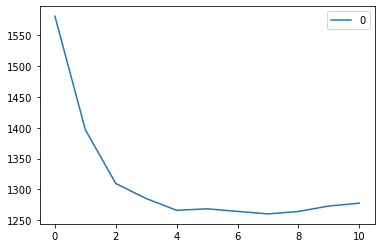

In [221]:
#curve=pd.DataFrame(rmse_val_list)
#curve.plot() # Elbow curve
curve = pd.DataFrame(Error)
curve.plot()

## Alternate way to get the value of N

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
num_of_neighbors=range(1,200)

In [224]:
params={"n_neighbors":num_of_neighbors }

In [225]:
knn= knr()
model=GridSearchCV(knn,params,cv=5)

In [226]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 200)})

In [227]:
print(model.best_params_)

{'n_neighbors': 8}


## Checking the error in model using Linear Regression

In [228]:
from sklearn.linear_model import LinearRegression

In [229]:
linearRegressor = LinearRegression()

In [230]:
linearRegressor.fit(x_train, y_train)

LinearRegression()

In [231]:
yPrediction = linearRegressor.predict(x_test)

In [232]:
error=sqrt(mse(y_test,yPrediction))

In [233]:
error

1173.460151398936

## Steps to reduce the error

In [200]:
# Finding hte correlation between columns
print(rish1.corr())

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008301           0.011550  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


In [202]:
import seaborn as sb
import matplotlib.pyplot as plt

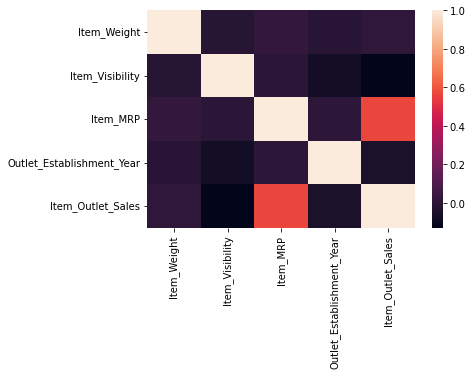

In [203]:
dataplot=sb.heatmap(rish1.corr())